<h1>Loading style image and preprocessing</h1>
<p>Specify path for input image. Increase the size reduction factor to reduce memory footprint. </p>

In [4]:
from PIL import Image
import numpy as np

# loading input and resize if needed
image = Image.open("PATH TO IMAGE")
size_reduction_factor = 1 
image = image.resize((int(image.size[0] / size_reduction_factor), int(image.size[1] / size_reduction_factor)), Image.ANTIALIAS)

# Preprocess image
x = np.array(image).astype('float32')
x = np.transpose(x, [2, 0, 1])
x = np.expand_dims(x, axis=0)

<h1>Running the model in ORT and postprocessing</h1>
<p>After running this block, the output image will show up.</p>

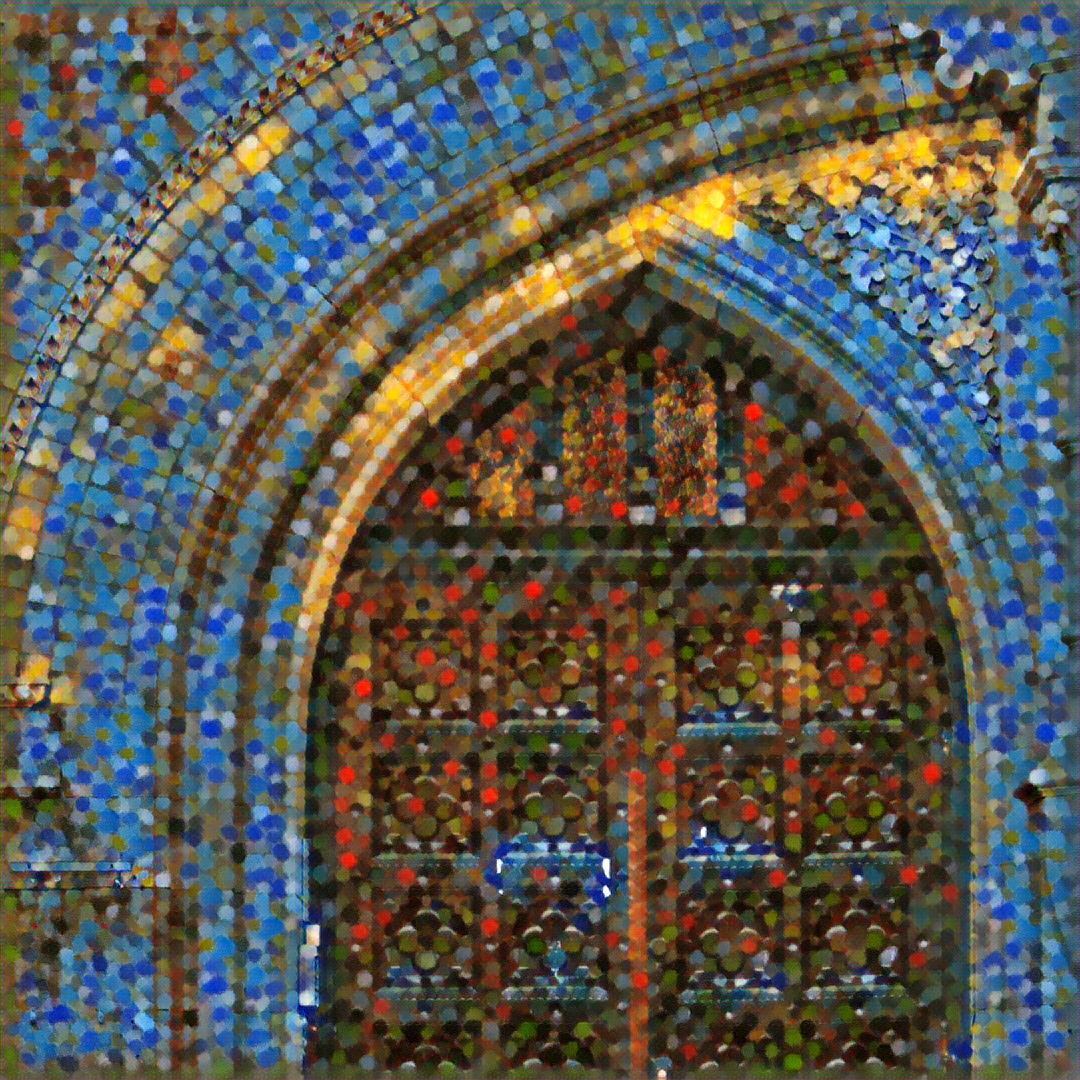

In [5]:
output_name = session.get_outputs()[0].name
input_name = session.get_inputs()[0].name
result = session.run([output_name], {input_name: x})[0][0] 

# postprocess
result = np.clip(result, 0, 255)
result = result.transpose(1,2,0).astype("uint8")
img = Image.fromarray(result)
img